## Exploring Datasets with pandas and Matplotlib

### Downloading and Prepping Data

In [2]:
import numpy as np
import pandas as pd
from PIL import Image

In [3]:
df_can = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true",
                       sheet_name="Canada by Citizenship",
                       skiprows=range(20),
                       skipfooter=2
                      )

print("Data download and read into a dataframe")

Data download and read into a dataframe


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# Print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis = 1, inplace = True)

# Let's rename the columns so that they make sense
df_can.rename(columns = {"OdName":"Country",
                         "AreaName":"Continent",
                         "RegName":"Region"
                        },
              inplace = True
             )

# For sake of consistency, let;s also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# Set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index("Country", inplace = True)

# Add total column
df_can["Total"] = df_can.sum(axis = 1)

# Years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print("Data Dimensions:", df_can.shape)

Data Dimensions: (195, 38)


C:\Users\umam1\AppData\Local\Temp/ipykernel_5328/3108291861.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can["Total"] = df_can.sum(axis = 1)


### Visualizing Data Using Matplotlib

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
# Needed for waffle Charts
import matplotlib.patches as mpacthes 

# Optional : for ggplot-like style
mpl.style.use("ggplot")

# Check for latest version of Matlpotlib
print("Matplotlib Version : ", mpl.__version__)

Matplotlib Version :  3.4.3


### Waffle Charts (Optional)

In [8]:
# Let's create a new dataframe for these three countries
df_dsn = df_can.loc[["Denmark", "Norway", "Sweden"], :]

# Let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


<b>Step 1</b> : Langkah pertama untuk membuat waffle adalah menentukan proporsi setiap kategori sehubungan dengan totalnya

In [9]:
# Compute the proportion of each category with respect to the total
total_values = sum(df_dsn["Total"])
category_proportions = [(float(value) / total_values) for value in
df_dsn["Total"]]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ": " + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


<b>Step 2</b> : Langkah kedua adalah menentukan ukuran keseluruhan dari waffle chart

In [10]:
width = 40  # width of chart
height = 10  # height of chart

total_num_tiles = width * height  # total number of tiles

print("Total number of tiles is", total_num_tiles)

Total number of tiles is 400


<b>Step 3</b> : Langkah ketiga adalah menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

In [11]:
# Compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles)
                      for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ": " + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Berdasarkan proporsi yang dihitung, Denmark akan menempati 129 ubin, Norwegia akan menempati 77 ubin, dan Swedia akan menempati 194 ubin.

<b>Step 4</b> : Langkah keempat adalah membuat matriks yang meneyerupai wafel dan mengisinya

In [12]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current
        # category is equal to it's corresponding allocated tiles..
        if tile_index > sum(tiles_per_category[0:category_index]):

            # ... proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print("Waffle chart populated")

Waffle chart populated


In [13]:
# Menampilkan tampilan matriks
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Seperti yang diharapkan, matriks terdiri dari tiga kategori dan jumlah total instance setiap kategori sesuai dengan jumlah ubin yang dialokasikan untuk setiap kategori

<b>Step 5</b> : Petakan matriks waffle chart menjadi visual

<Figure size 432x288 with 0 Axes>

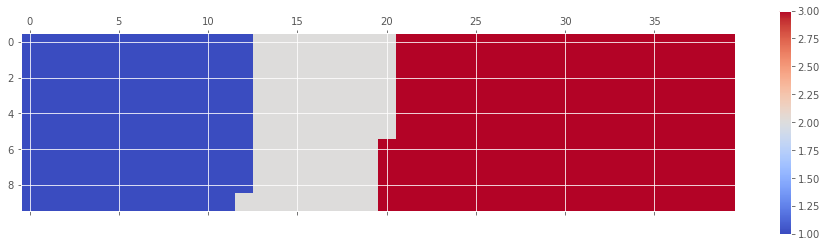

In [14]:
# instantiate a new figure object
fig = plt.figure();

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm;
plt.matshow(waffle_chart, cmap = colormap);
plt.colorbar();

<b>Step 6</b> : Perantik Chart

<Figure size 432x288 with 0 Axes>

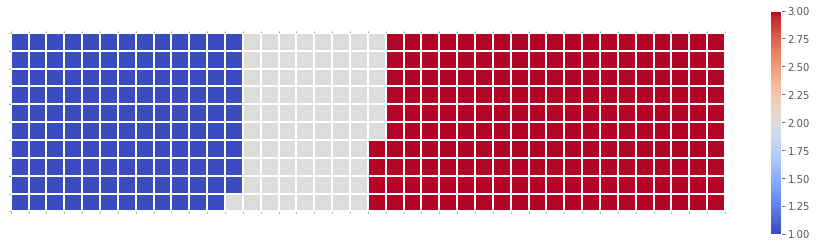

In [15]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm;
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines based on minor ticks
ax.grid(which = "minor", color = "w", linestyle="-", linewidth=2)

plt.xticks([]);
plt.yticks([]);

<b>Step 7</b> : Tambahkan Legend

<Figure size 432x288 with 0 Axes>

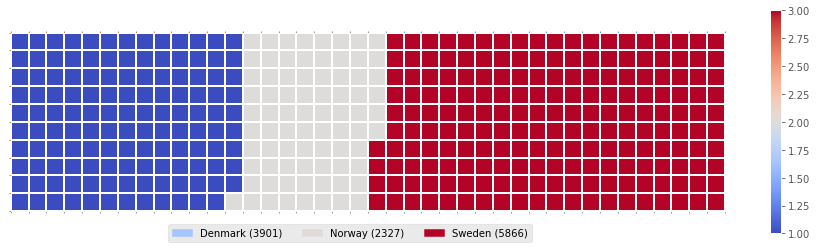

In [16]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

plt.xticks([])
plt.yticks([])

# compute comulative sum of individual categories
# to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn["Total"])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + " (" + str(df_dsn["Total"][i]) + ")"
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpacthes.Patch(color=color_val, label=label_str))
    
# add legend to chart
plt.legend(handles = legend_handles,
           loc = "lower center",
           ncol = len(df_dsn.index.values),
           bbox_to_anchor = (0., -0.2, 0.95, -1)
          )

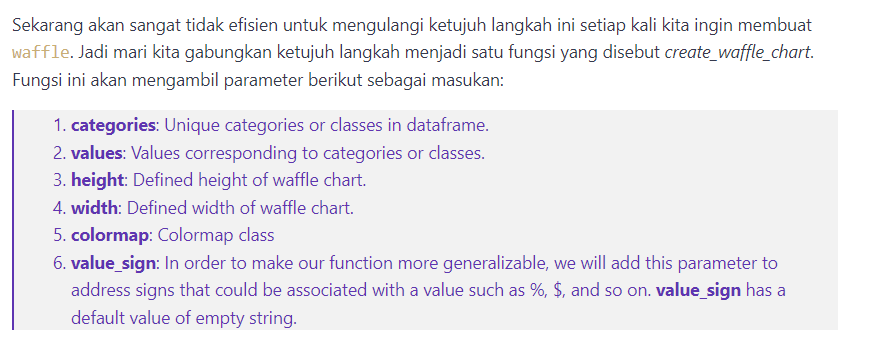

In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign = ""):
    
    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    # compute the total number of tiles
    total_num_tiles = width * height # -> total number of tiles
    print("Total number of tiles is", total_num_tiles)
    
    # compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ": " + str(tiles))
    
    # initialize tha waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))
    
    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0
    
    # populated the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1
            
            # if the number of tiles populated for the current category
            # is equal to it's corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1
                
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()
    
    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap = colormap)
    plt.colorbar()
    
    # get the axis
    ax = plt.gca()
    
    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor = True)
    
    # add dridlines based on minor ticks
    ax.grid(which = "minor", color = "w", linestyle = "-", linewidth = 2)
    
    plt.xticks([])
    plt.yticks([])
    
    # compute cumulative sum of individual categories 
    # to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == "%":
            label_str = category + " (" + str(values[i]) + value_sign + ")"
        else:
            label_str = category + " (" + value_sign +  str(values[i]) + ")"
            
        color_val = colormap(float(values_cumsum[i]) / total_values)
        legend_handles.append(mpacthes.Patch(color = color_val, label = label_str))
    
    # add legend to chart
    plt.legend(
        handles = legend_handles,
        loc = "lower center",
        ncol = len(categories),
        bbox_to_anchor = (0., -0.2, 0.95, -1)
    )

Sekarang untuk membuat waffle, yang harus kita lakukan adalah memanggila fungsi create_waffle_chart. Mari tentukan parameter input

In [18]:
width = 40 # width of chart
height = 10 # height of chart

# categories
categories = df_dsn.index.values

# corresponding values of categories
values = df_dsn["Total"]

# color map class
colormap = plt.cm.coolwarm

Dan sekarang mari kita panggil fungsi kita untuk membuat waffle

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

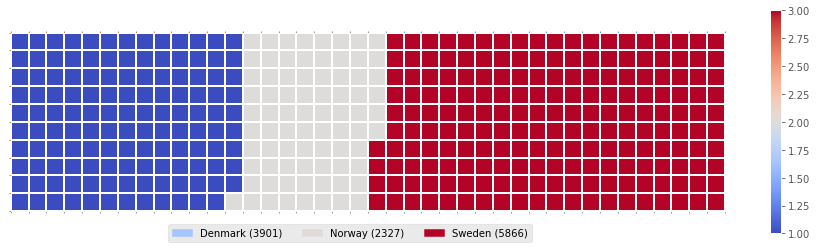

In [19]:
create_waffle_chart(categories, values, height, width, colormap)

### Word Clouds

install package

In [24]:
# install wordcloud
# conda install -c conda-forge wordcloud

#import package and it's set of stopwords
from wordcloud import WordCloud, STOPWORDS

print("Wordcloud is installed and imported!")

Wordcloud is installed and imported!


In [25]:
# import request
import urllib.request

print("Imported!")

Imported!


In [26]:
# # download file
# url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'
# # simpan data
# alice_novel = 'alice_novel.txt'

# print("File downloaded and save")

alice_novel= open('assets/alice_novel.txt', 'r').read()

In [28]:
stopwords = set(STOPWORDS)

Buatword cloud object dan generate word cloud. Agar lebih ringkas, mari kita buat word cloud hanya dengan menggunakan 2000 kata pertama dalam novel

In [29]:
alice_wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

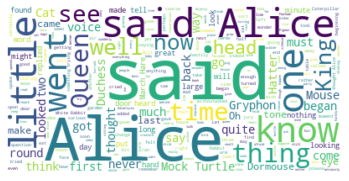

In [30]:
#display wordcloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Menarik! Jadi di 2000 kata pertama dalam novel, kata yang paling umum adalah Alice, said, little, went dan seterusnya. Mari ubah ukuran cloud sehingga kita dapat melihat kata-kata yang jarang digunakan dengan lebih baik

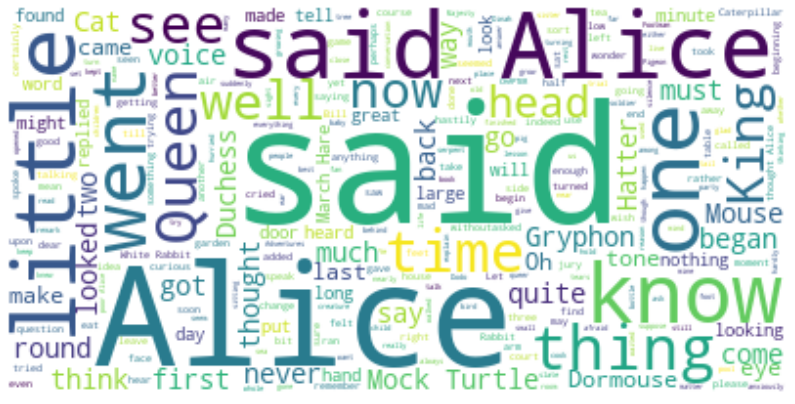

In [31]:
fig = plt.figure()
# set width
fig.set_figwidth(14)
# set height
fig.set_figheight(18)

#display wordcloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jauh lebih baik! Namun, <b>said</b> bukanlah kata yang informatif. Jadi, mari tambahkan ke stopwords kita akan buat ulang cloud

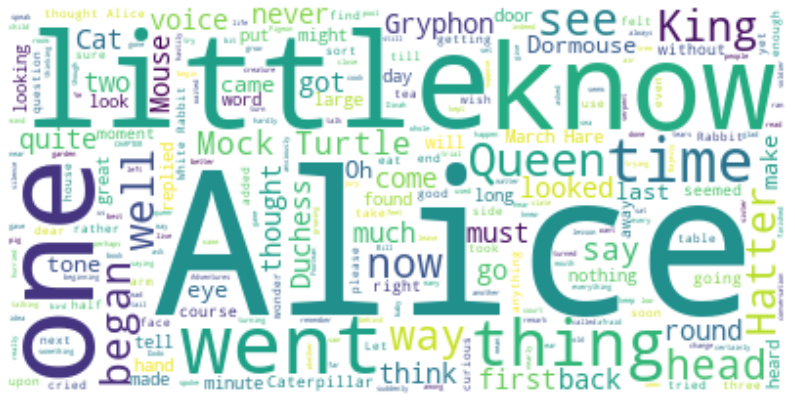

In [32]:
# add the words said to stopwords
stopwords.add("said")

# re-generate the world cloud
alice_wc.generate(alice_novel)

#display wordcloud
fig = plt.figure()
# set width
fig.set_figwidth(14)
# set height
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
# download file
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png", "assets/alice_mask.png")

alice_mask= np.array(Image.open('assets/alice_mask.png'))
print("Image downloaded and saved!")

Image downloaded and saved!


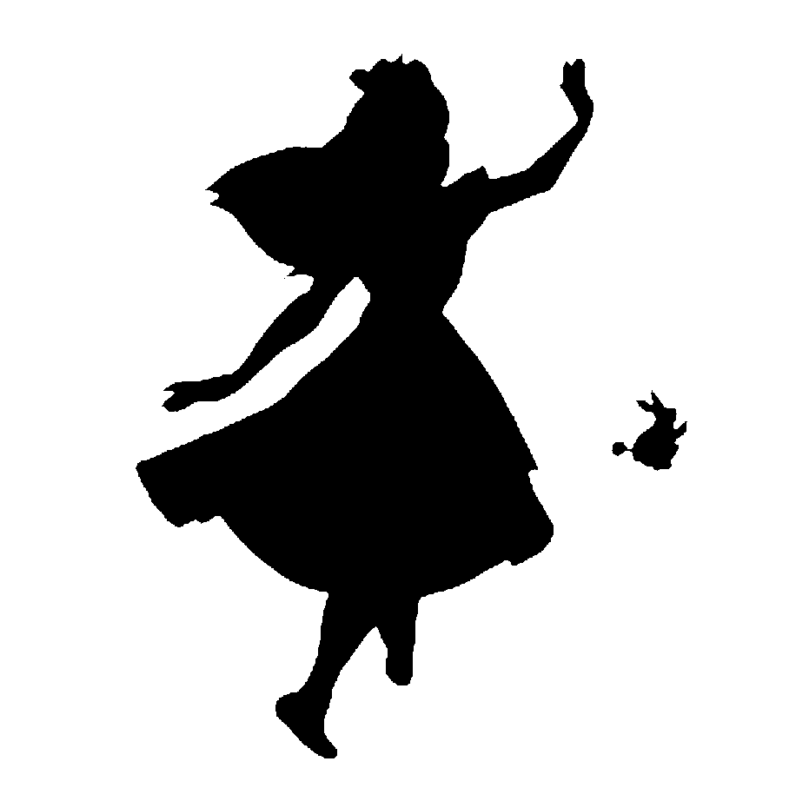

In [34]:
fig = plt.figure()
# set width
fig.set_figwidth(14)
# set height
fig.set_figheight(18)


plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk word cloud sesuai dengan masking sangat mudah dengan menggunakan word_cloud. Agar simple kita akan terus menggunakan 2000 kata pertama dalam novel

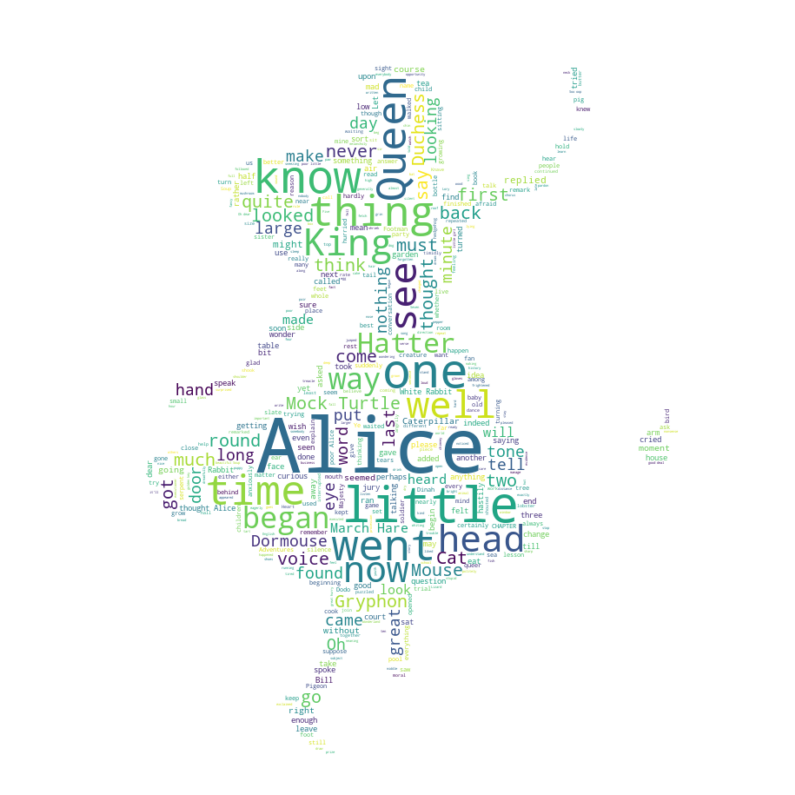

In [35]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
# set width
fig.set_figwidth(14)
# set height
fig.set_figheight(18)


plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


dan berapa total imigrasi dari 1980 hingga 2013?

In [37]:
total_immigration = df_can["Total"].sum()
total_immigration

6409153

Menggunakan countries dengan nama satu kata, mari kita duplikat nama masing-masinging negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi.

In [38]:
max_words = 90
word_string = ""

for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(" ")) == 1:
        repeat_num_times = int(df_can.loc[country, "Total"]/ float(total_immigration) * max_words)
        word_string = word_string + ((country + " ") * repeat_num_times)
        
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [39]:
# create the word cloud
wordcloud = WordCloud(background_color="white").generate(word_string)

print("Word Cloud Created!")

Word Cloud Created!


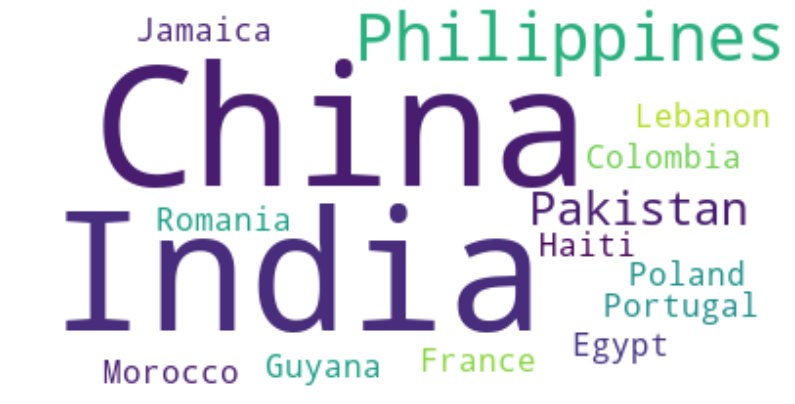

In [40]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Menurut word cloud di atas, sepertinya mayoritas orang yang berimigrasi berasal dari salah satu dari 15 negara yang ditampilkan oleh word cloud. Satu visual keren yang bisa kalian bangun, mungkin menggunakan peta Kanada dan masking dan melapiskan word cloud di atas peta Kanada. Itu akan menjadi visual yang menarik untuk dibangun!

### Regression Plots

In [41]:
# install seaborn
# conda install -c anaconda seaborn

# import library
import seaborn as sns

print("Seaborn installed and imported!")

Seaborn installed and imported!


Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013

In [42]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis = 0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ["year", "total"]

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Dengan seaborn, membuat plot regresi semudah memanggil fungsi <b>regplot</b>

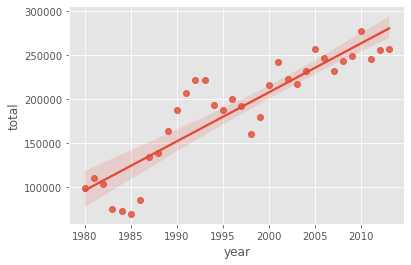

In [43]:
import seaborn as sns

ax = sns.regplot(x = "year", y = "total", data = df_tot)

Kita juga dapat menyesuaikan warna scatter plot dan garis regresi.

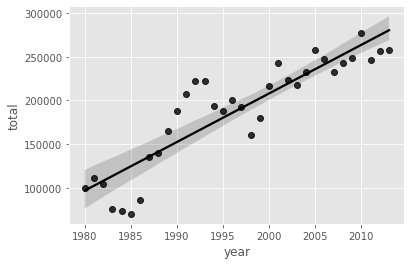

In [44]:
ax = sns.regplot(x="year", y="total", data=df_tot, color="black")

Kita juga dapat menyesuaikan bentuk marker, dari circular markers menjadi "+"

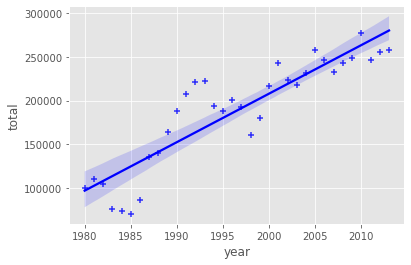

In [45]:
ax = sns.regplot(x="year", y="total", data=df_tot, color="blue", marker="+")

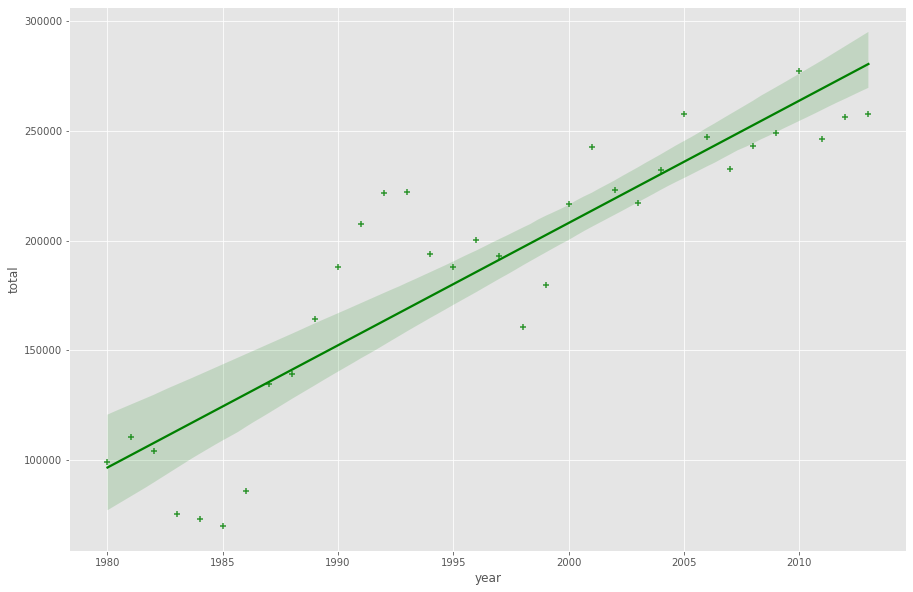

In [46]:
# atur size
plt.figure(figsize=(15, 10))
ax = sns.regplot(x="year", y="total", data=df_tot, color="green", marker="+")

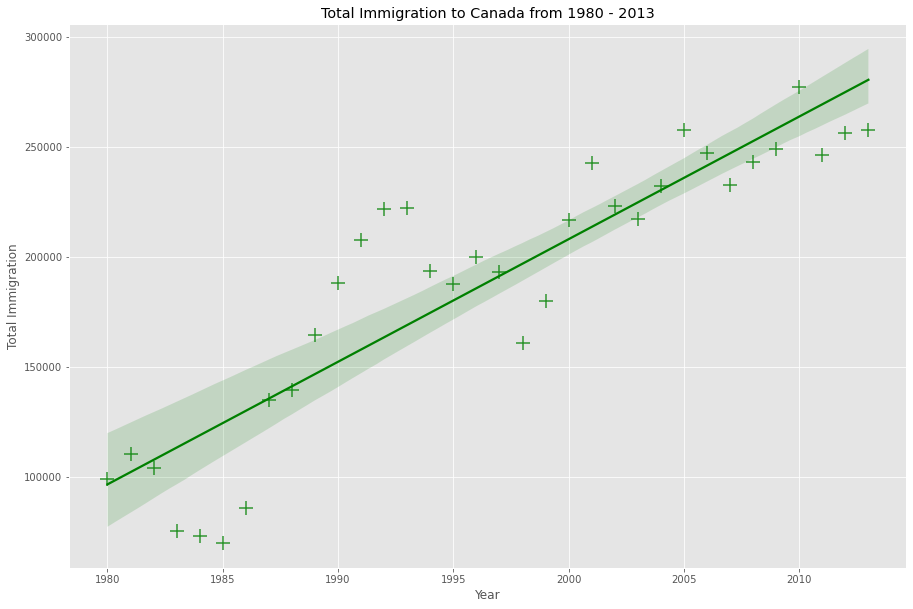

In [47]:
# atur size
plt.figure(figsize=(15, 10))
ax = sns.regplot(x="year", y="total", data=df_tot, color="green", marker="+", scatter_kws={"s": 200})

# add x- and y-labels
ax.set(xlabel = "Year", ylabel = "Total Immigration")
# add title
ax.set_title("Total Immigration to Canada from 1980 - 2013");

Meningkatkan ukuran font pada label dengan tanda centang, judul, dan label x dan y agar tidak terlihat berbeda!

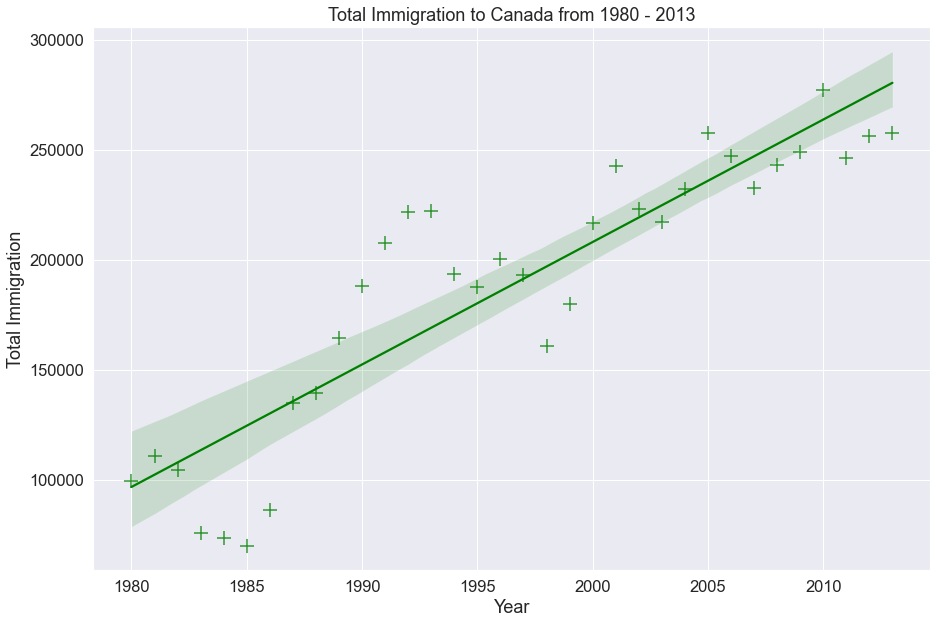

In [48]:
plt.figure(figsize=(15, 10))

# Ukuran Huruf
sns.set(font_scale = 1.5)

ax = sns.regplot(x="year", y="total", data=df_tot, color="green", marker="+", scatter_kws={"s": 200})

# add x- and y-labels
ax.set(xlabel = "Year", ylabel = "Total Immigration")
# add title
ax.set_title("Total Immigration to Canada from 1980 - 2013");

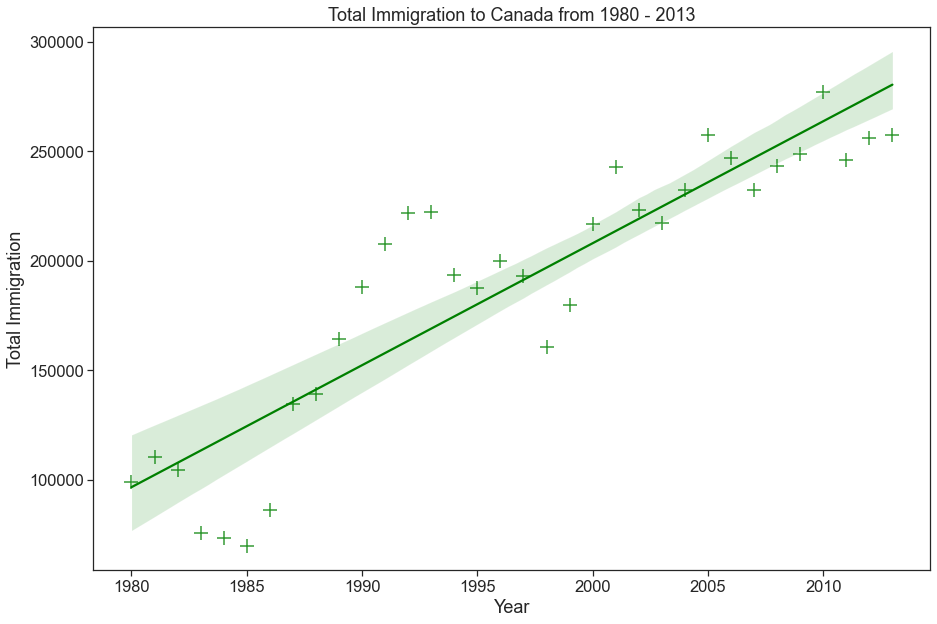

In [49]:
plt.figure(figsize=(15, 10))

# Ukuran Huruf
sns.set(font_scale = 1.5)
# Change background to white background
sns.set_style("ticks")

ax = sns.regplot(x="year", y="total", data=df_tot, color="green", marker="+", scatter_kws={"s": 200})

# add x- and y-labels
ax.set(xlabel = "Year", ylabel = "Total Immigration")
# add title
ax.set_title("Total Immigration to Canada from 1980 - 2013");

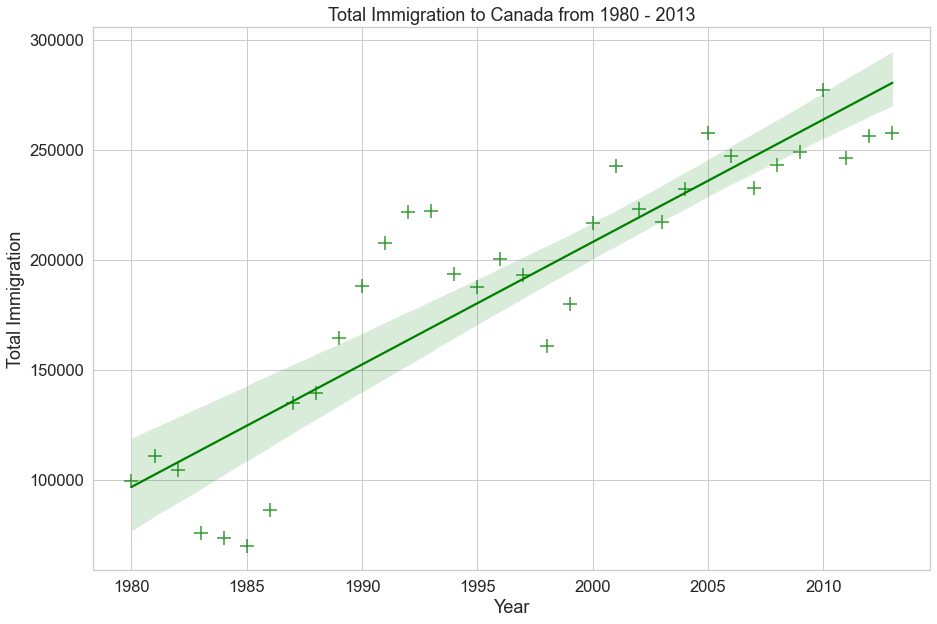

In [50]:
plt.figure(figsize=(15, 10))

# Ukuran Huruf
sns.set(font_scale = 1.5)
# Change background to white background for grid
sns.set_style("whitegrid")

ax = sns.regplot(x="year", y="total", data=df_tot, color="green", marker="+", scatter_kws={"s": 200})

# add x- and y-labels
ax.set(xlabel = "Year", ylabel = "Total Immigration")
# add title
ax.set_title("Total Immigration to Canada from 1980 - 2013");

<b>Pertanyaan :</b> Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

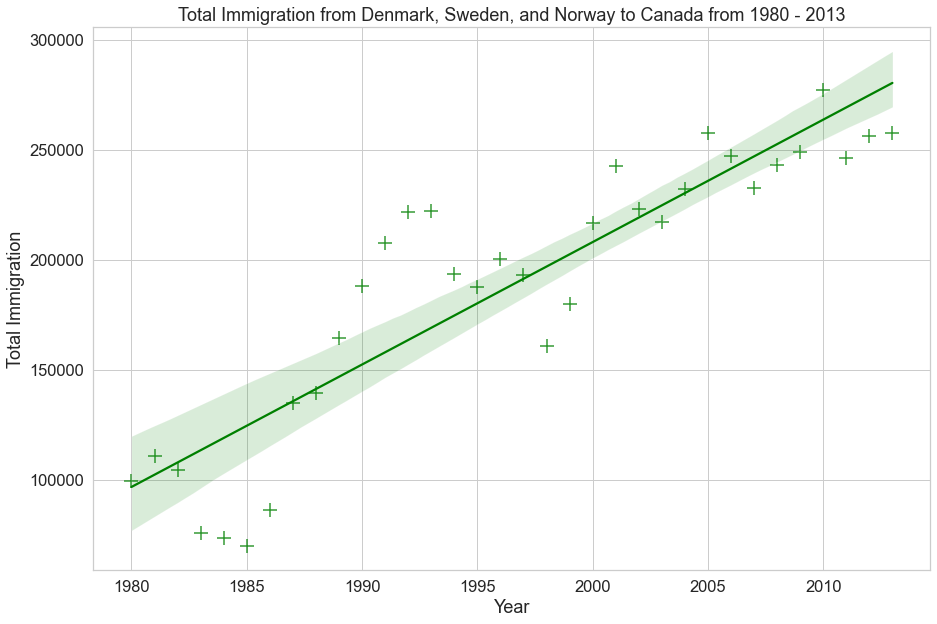

In [51]:
# create df_countries dataframe
df_countries = df_can.loc[["Denmark", "Norway", "Sweden"], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ["year", "total"]

# change column year from string to int to create scatter plot
df_total["year"] = df_total["year"].astype(int)

# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
# Ukuran Huruf
sns.set(font_scale=1.5)
# Change background to white background for grid
sns.set_style("whitegrid")

ax = sns.regplot(x="year", y="total", data=df_tot,
                 color="green", marker="+", scatter_kws={"s": 200})

# add x- and y-labels
ax.set(xlabel="Year", ylabel="Total Immigration")
# add title
ax.set_title("Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013")